### CHECK CORRELATIONS AND DISTRIBUTIONS BETWEEN DAILY RETURNS

## import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import boto3
from botocore.client import Config
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle

os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()


location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')

#df_name_list = ['df_bidlo', 'df_askhi', 'df_price', 'df_volume', 'df_returns', 'df_shares_out', 'df_spread', 'df_market_cap']

## lets keep: 'df_price', 'df_volume', 'df_returns', 'df_shares_out', 'df_spread', 'df_market_cap'

### marketcap and shares out will have repeating values for most days, this could weigh on the 

### should we build sliding window classifiers? like 1 classifier per company to denote a customized classifier?

### import price

In [2]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_price07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_price = pd.read_csv(StringIO(csv_string))
df_price.index = df_price['Unnamed: 0']
df_price = df_price.drop('Unnamed: 0', axis=1)
df_price.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
#df_returns = df_bidlo.T
#df_returns.index = pd.to_datetime(df_returns.index)
#print(df_price.shape)
df_price.head()

,2007-01-03,2007-01-04,2007-01-05,2007-01-08,2007-01-09,2007-01-10,2007-01-11,2007-01-12,2007-01-16,2007-01-17,...,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-24,2018-12-26,2018-12-27,2018-12-28,2018-12-31
date,,,,,,,,,,,,,,,,,,,,,
ORCL_ORACLE CORP,17.51,17.68,17.64,17.86,17.82,17.77,17.39,17.50,17.30,17.52,...,45.73,45.85000,46.45000,46.24,44.00,42.69,44.59000,44.97000,44.82000,45.15
MSFT_MICROSOFT CORP,29.86,29.81,29.64,29.93,29.96,29.66,30.70,31.21,31.16,31.10,...,102.89,103.97000,103.69000,101.51,98.23,94.13,100.56000,101.18000,100.39000,101.57
TROW_T ROWE PRICE GROUP INC,45.75,46.15,46.06,46.90,47.09,47.36,48.29,48.56,48.06,48.25,...,91.03,90.80000,88.41000,87.30,86.78,84.95,89.65000,91.31000,91.34000,92.32
HON_HONEYWELL INTERNATIONAL INC,45.10,45.08,44.65,44.92,45.24,44.96,45.71,45.56,45.62,45.54,...,134.38,135.17999,133.25999,130.67,129.44,124.83,129.57001,131.57001,130.75999,132.12
ADM_ARCHER DANIELS MIDLAND CO,32.06,31.88,31.83,31.99,31.21,30.94,31.68,30.96,31.02,31.18,...,43.38,42.84000,42.40000,41.23,40.80,39.62,40.67000,40.96000,40.78000,40.97


### import volume 

In [3]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_volume07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_volume = pd.read_csv(StringIO(csv_string))
df_volume.index = df_volume['Unnamed: 0']
df_volume = df_volume.drop('Unnamed: 0', axis=1)
df_volume.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
#df_returns = df_bidlo.T
#df_returns.index = pd.to_datetime(df_returns.index)
print(df_volume.shape)
df_volume.head()

(388, 3021)


,2007-01-03,2007-01-04,2007-01-05,2007-01-08,2007-01-09,2007-01-10,2007-01-11,2007-01-12,2007-01-16,2007-01-17,...,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-24,2018-12-26,2018-12-27,2018-12-28,2018-12-31
date,,,,,,,,,,,,,,,,,,,,,
ORCL_ORACLE CORP,52271846.0,34992680.0,33812092.0,31018863.0,31417003.0,27822425.0,65590483.0,42526442.0,35744443.0,32818913.0,...,30441145.0,42855600.0,34397250.0,35165179.0,58768410.0,17230381.0,21428929.0,19048702.0,39141279.0,14932651.0
MSFT_MICROSOFT CORP,77630458.0,46650955.0,44681937.0,52021978.0,44708046.0,56867092.0,99520582.0,104312728.0,62442064.0,60649602.0,...,56956564.0,49417797.0,68187880.0,70334184.0,111239770.0,43935112.0,51627193.0,49495409.0,38162485.0,33173365.0
TROW_T ROWE PRICE GROUP INC,2605194.0,1598889.0,1718799.0,1275148.0,1410212.0,1048077.0,1092509.0,756835.0,1077489.0,1305884.0,...,1959973.0,1804473.0,1863185.0,2156700.0,4232675.0,1005519.0,1587486.0,1290839.0,1093473.0,1449392.0
HON_HONEYWELL INTERNATIONAL INC,3505100.0,2630200.0,3035100.0,2589100.0,3043900.0,2320200.0,3039900.0,2663900.0,2355800.0,2710400.0,...,3133214.0,2637752.0,3868924.0,4518936.0,6903728.0,2838791.0,3440398.0,3249638.0,2759324.0,2199898.0
ADM_ARCHER DANIELS MIDLAND CO,7380900.0,4442000.0,5798200.0,4892600.0,5121500.0,7781800.0,6887100.0,7697200.0,7004000.0,5488600.0,...,3286593.0,3522154.0,3124806.0,5450046.0,8213689.0,2541051.0,3380531.0,3809906.0,3046536.0,2718177.0


### import returns

In [4]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_returns07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_returns = pd.read_csv(StringIO(csv_string))
df_returns.index = df_returns['Unnamed: 0']
df_returns = df_returns.drop('Unnamed: 0', axis=1)
df_returns.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
#df_returns = df_bidlo.T
#df_returns.index = pd.to_datetime(df_returns.index)
df_returns.head()

,2007-01-03,2007-01-04,2007-01-05,2007-01-08,2007-01-09,2007-01-10,2007-01-11,2007-01-12,2007-01-16,2007-01-17,...,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-24,2018-12-26,2018-12-27,2018-12-28,2018-12-31
date,,,,,,,,,,,,,,,,,,,,,
ORCL_ORACLE CORP,0.021587,0.009709,-0.002262,0.012472,-0.002240,-0.002806,-0.021384,0.006326,-0.011429,0.012717,...,-0.018670,0.002624,0.013086,-0.004521,-0.048443,-0.029773,0.044507,0.008522,-0.003336,0.007363
MSFT_MICROSOFT CORP,0.000000,-0.001675,-0.005703,0.009784,0.001002,-0.010013,0.035064,0.016612,-0.001602,-0.001926,...,-0.029614,0.010497,-0.002693,-0.021024,-0.032312,-0.041739,0.068310,0.006166,-0.007808,0.011754
TROW_T ROWE PRICE GROUP INC,0.045236,0.008743,-0.001950,0.018237,0.004051,0.005734,0.019637,0.005591,-0.010297,0.003953,...,-0.010221,-0.002527,-0.026322,-0.012555,-0.005957,-0.021088,0.055327,0.018516,0.000329,0.010729
HON_HONEYWELL INTERNATIONAL INC,-0.003095,-0.000443,-0.009539,0.006047,0.007124,-0.006189,0.016681,-0.003282,0.001317,-0.001754,...,-0.015098,0.005953,-0.014203,-0.019436,-0.009413,-0.035615,0.037972,0.015436,-0.006157,0.010401
ADM_ARCHER DANIELS MIDLAND CO,0.003129,-0.005615,-0.001568,0.005027,-0.024383,-0.008651,0.023917,-0.022727,0.001938,0.005158,...,-0.027572,-0.012448,-0.010271,-0.027594,-0.010429,-0.028922,0.026502,0.007131,-0.004395,0.004659


### import shares out

In [5]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_shares_out07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_sharesout = pd.read_csv(StringIO(csv_string))
df_sharesout.index = df_sharesout['Unnamed: 0']
df_sharesout = df_sharesout.drop('Unnamed: 0', axis=1)
df_sharesout.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
#df_returns = df_bidlo.T
#df_returns.index = pd.to_datetime(df_returns.index)
df_sharesout.head()

,2007-01-03,2007-01-04,2007-01-05,2007-01-08,2007-01-09,2007-01-10,2007-01-11,2007-01-12,2007-01-16,2007-01-17,...,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-24,2018-12-26,2018-12-27,2018-12-28,2018-12-31
date,,,,,,,,,,,,,,,,,,,,,
ORCL_ORACLE CORP,5182191.0,5182191.0,5182191.0,5182191.0,5182191.0,5182191.0,5182191.0,5182191.0,5182191.0,5182191.0,...,3787960.0,3787960.0,3787960.0,3787960.0,3787960.0,3787960.0,3787960.0,3787960.0,3787960.0,3588919.0
MSFT_MICROSOFT CORP,9777000.0,9777000.0,9777000.0,9777000.0,9777000.0,9777000.0,9777000.0,9777000.0,9777000.0,9777000.0,...,7676219.0,7676219.0,7676219.0,7676219.0,7676219.0,7676219.0,7676219.0,7676219.0,7676219.0,7676219.0
TROW_T ROWE PRICE GROUP INC,264960.0,264960.0,264960.0,264960.0,264960.0,264960.0,264960.0,264960.0,264960.0,264960.0,...,240655.0,240655.0,240655.0,240655.0,240655.0,240655.0,240655.0,240655.0,240655.0,240655.0
HON_HONEYWELL INTERNATIONAL INC,816510.0,816510.0,816510.0,816510.0,816510.0,816510.0,816510.0,816510.0,816510.0,816510.0,...,740288.0,740288.0,740288.0,740288.0,740288.0,740288.0,740288.0,740288.0,740288.0,740288.0
ADM_ARCHER DANIELS MIDLAND CO,657246.0,657246.0,657246.0,657246.0,657246.0,657246.0,657246.0,657246.0,657246.0,657246.0,...,560644.0,560644.0,560644.0,560644.0,560644.0,560644.0,560644.0,560644.0,560644.0,560644.0


### import spread

In [6]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_spread07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_spread = pd.read_csv(StringIO(csv_string))
df_spread.index = df_spread['Unnamed: 0']
df_spread = df_spread.drop('Unnamed: 0', axis=1)
df_spread.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
#df_market_cap = df_market_cap.T
# df_market_cap.index = pd.to_datetime(df_bidlo.index)
df_spread.head()

,2007-01-03,2007-01-04,2007-01-05,2007-01-08,2007-01-09,2007-01-10,2007-01-11,2007-01-12,2007-01-16,2007-01-17,...,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-24,2018-12-26,2018-12-27,2018-12-28,2018-12-31
date,,,,,,,,,,,,,,,,,,,,,
ORCL_ORACLE CORP,0.68,0.57,0.32,0.4801,0.33,0.2501,0.4600,0.270,0.2201,0.431,...,1.70000,2.90000,1.69,1.47,2.350,1.14000,2.21000,1.6300,1.02500,0.6600
MSFT_MICROSOFT CORP,0.85,0.53,0.30,0.5700,0.45,0.4600,1.1001,0.750,0.4200,0.430,...,4.09000,1.99000,5.53,5.53,5.540,3.99000,6.73000,4.7900,2.89000,1.9600
TROW_T ROWE PRICE GROUP INC,1.22,0.75,0.49,1.3700,0.69,0.9200,1.0000,0.558,0.9400,0.500,...,2.63520,2.31000,4.05,2.08,3.940,2.74250,5.14000,3.3700,1.74000,1.3600
HON_HONEYWELL INTERNATIONAL INC,0.81,0.83,0.82,0.7400,0.66,0.4700,0.8300,0.660,0.4900,0.580,...,3.59999,2.37999,5.61,4.25,3.120,4.36001,6.12001,4.7862,2.82001,1.6900
ADM_ARCHER DANIELS MIDLAND CO,0.94,0.69,0.52,0.7300,0.80,0.8600,1.8000,1.500,0.8500,0.670,...,1.33000,1.38000,1.46,1.59,1.245,1.28000,1.53000,1.1900,0.99000,0.5362


### import marketcap

In [7]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_market_cap07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_marketcap = pd.read_csv(StringIO(csv_string))
df_marketcap.index = df_marketcap['Unnamed: 0']
df_marketcap = df_marketcap.drop('Unnamed: 0', axis=1)
df_marketcap.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
#df_market_cap = df_market_cap.T
# df_market_cap.index = pd.to_datetime(df_bidlo.index)
df_marketcap.head()

,2007-01-03,2007-01-04,2007-01-05,2007-01-08,2007-01-09,2007-01-10,2007-01-11,2007-01-12,2007-01-16,2007-01-17,...,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-24,2018-12-26,2018-12-27,2018-12-28,2018-12-31
date,,,,,,,,,,,,,,,,,,,,,
ORCL_ORACLE CORP,9.074016e+07,9.162114e+07,9.141385e+07,9.255393e+07,9.234664e+07,9.208753e+07,9.011830e+07,9.068834e+07,8.965190e+07,9.079199e+07,...,1.732234e+08,1.736780e+08,1.759507e+08,1.751553e+08,1.666702e+08,1.617080e+08,1.689051e+08,1.703446e+08,1.697764e+08,1.620397e+08
MSFT_MICROSOFT CORP,2.919412e+08,2.914524e+08,2.897903e+08,2.926256e+08,2.929189e+08,2.899858e+08,3.001539e+08,3.051402e+08,3.046513e+08,3.040647e+08,...,7.898062e+08,7.980965e+08,7.959471e+08,7.792130e+08,7.540350e+08,7.225625e+08,7.719206e+08,7.766798e+08,7.706156e+08,7.796736e+08
TROW_T ROWE PRICE GROUP INC,1.212192e+07,1.222790e+07,1.220406e+07,1.242662e+07,1.247697e+07,1.254851e+07,1.279492e+07,1.286646e+07,1.273398e+07,1.278432e+07,...,2.190682e+07,2.185147e+07,2.127631e+07,2.100918e+07,2.088404e+07,2.044364e+07,2.157472e+07,2.197421e+07,2.198143e+07,2.221727e+07
HON_HONEYWELL INTERNATIONAL INC,3.682460e+07,3.680827e+07,3.645717e+07,3.667763e+07,3.693891e+07,3.671029e+07,3.732267e+07,3.720020e+07,3.724919e+07,3.718387e+07,...,9.947990e+07,1.000721e+08,9.865077e+07,9.673343e+07,9.582288e+07,9.241015e+07,9.591912e+07,9.739970e+07,9.680005e+07,9.780685e+07
ADM_ARCHER DANIELS MIDLAND CO,2.107131e+07,2.095300e+07,2.092014e+07,2.102530e+07,2.051265e+07,2.033519e+07,2.082155e+07,2.034834e+07,2.038777e+07,2.049293e+07,...,2.432074e+07,2.401799e+07,2.377131e+07,2.311535e+07,2.287428e+07,2.221272e+07,2.280139e+07,2.296398e+07,2.286306e+07,2.296958e+07


## LIST OF COMPANIES

In [8]:
key_list = df_price.index
temp_list = key_list[:10]

### dont include shares out because those values are repeated over many days
## MAYBE ^

#### 'df_price', 'df_volume', 'df_returns', 'df_shares_out', 'df_spread', 'df_market_cap'
#### 15 pairs (6 choose 2) for each of the companies

for each company:
<br>
    compute each of the 16 pair wise correlations

In [9]:
df_list = [df_price, df_volume, df_returns, df_sharesout, df_spread, df_marketcap]

In [10]:
df_name_list = ['df_price', 'df_volume', 'df_returns', 'df_sharesout', 'df_spread', 'df_marketcap']

In [11]:
#del df_price, df_returns, df_sharesout, df_spread, df_marketcap

In [12]:
temp_list[0]

'ORCL_ORACLE CORP'

In [13]:
corr_df  = pd.DataFrame([])
for k in range(len(key_list)):
    corr_dic = {}
    ## pick the symbol name
    symbol_name = key_list[k]
    for i in range(len(df_name_list)):
        for j in range(len(df_name_list)):
                if i>=j:
                    pass
                else:                
                    temp_corr = np.corrcoef(df_list[i].loc[symbol_name, :], df_list[j].loc[symbol_name, :])[0][1]
                    temp_name = df_name_list[i].split('_')[1] + '~' + df_name_list[j].split('_')[1]
                    corr_dic[temp_name] = temp_corr
    temp_df = pd.DataFrame(corr_dic, index=[symbol_name])
    corr_df = pd.concat([corr_df, temp_df])
    

print(corr_df.shape)
corr_df.head()

(388, 15)


,price~volume,price~returns,price~sharesout,price~spread,price~marketcap,volume~returns,volume~sharesout,volume~spread,volume~marketcap,returns~sharesout,returns~spread,returns~marketcap,sharesout~spread,sharesout~marketcap,spread~marketcap
ORCL_ORACLE CORP,-0.571332,0.013738,-0.901007,0.116321,0.974932,-0.054767,0.547286,0.353587,-0.556315,0.006412,-0.049576,0.022005,-0.101719,-0.788858,0.103446
MSFT_MICROSOFT CORP,-0.453992,0.028335,-0.728189,0.584993,0.997671,-0.052411,0.525239,0.105823,-0.440364,-0.022411,-0.033430,0.029322,-0.340497,-0.683779,0.587816
TROW_T ROWE PRICE GROUP INC,-0.486859,0.019315,-0.505429,-0.003179,0.994200,0.022079,0.088985,0.500767,-0.507008,-0.008784,0.008722,0.019913,-0.038900,-0.412978,-0.016504
HON_HONEYWELL INTERNATIONAL INC,-0.507718,0.008450,-0.054713,0.332731,0.998932,-0.047224,-0.273908,0.253471,-0.520615,0.029276,-0.092413,0.009758,-0.272319,-0.012794,0.320227
ADM_ARCHER DANIELS MIDLAND CO,-0.408244,0.031149,-0.512719,-0.015200,0.957982,-0.045818,0.284268,0.517773,-0.363569,0.009260,-0.069317,0.037778,-0.006353,-0.246942,-0.013525


In [14]:
# fig, axs = plt.subplots(3, 5, figsize=(20,10))
# for i in range(corr_df.shape[1]):
#     temp_series = corr_df.iloc[:, i]
#     if i <5:
#         for k in range(5):
#             axs[0, k].hist(temp_series)
#             axs[0, k].set_title('Histogram of: {}'.format(corr_df.columns[i]))
#     elif i <10:
#         for k in range(5):
#             axs[1, k].hist(temp_series)
#             axs[1, k].set_title('Histogram of: {}'.format(corr_df.columns[i]))
#     else:
#         for k in range(5):
#             axs[2, k].hist(temp_series)
#             axs[2, k].set_title('Histogram of: {}'.format(corr_df.columns[i]))

In [15]:
#sorted(corr_list, key=lambda x: x[1])

## The idea is:
## Given a company, what were its pairwise correlations between each Metric?
## 6 metrics, 15 *distinct* pairs, 388 datapoints *per* pair of metrics, 15 histograms

C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


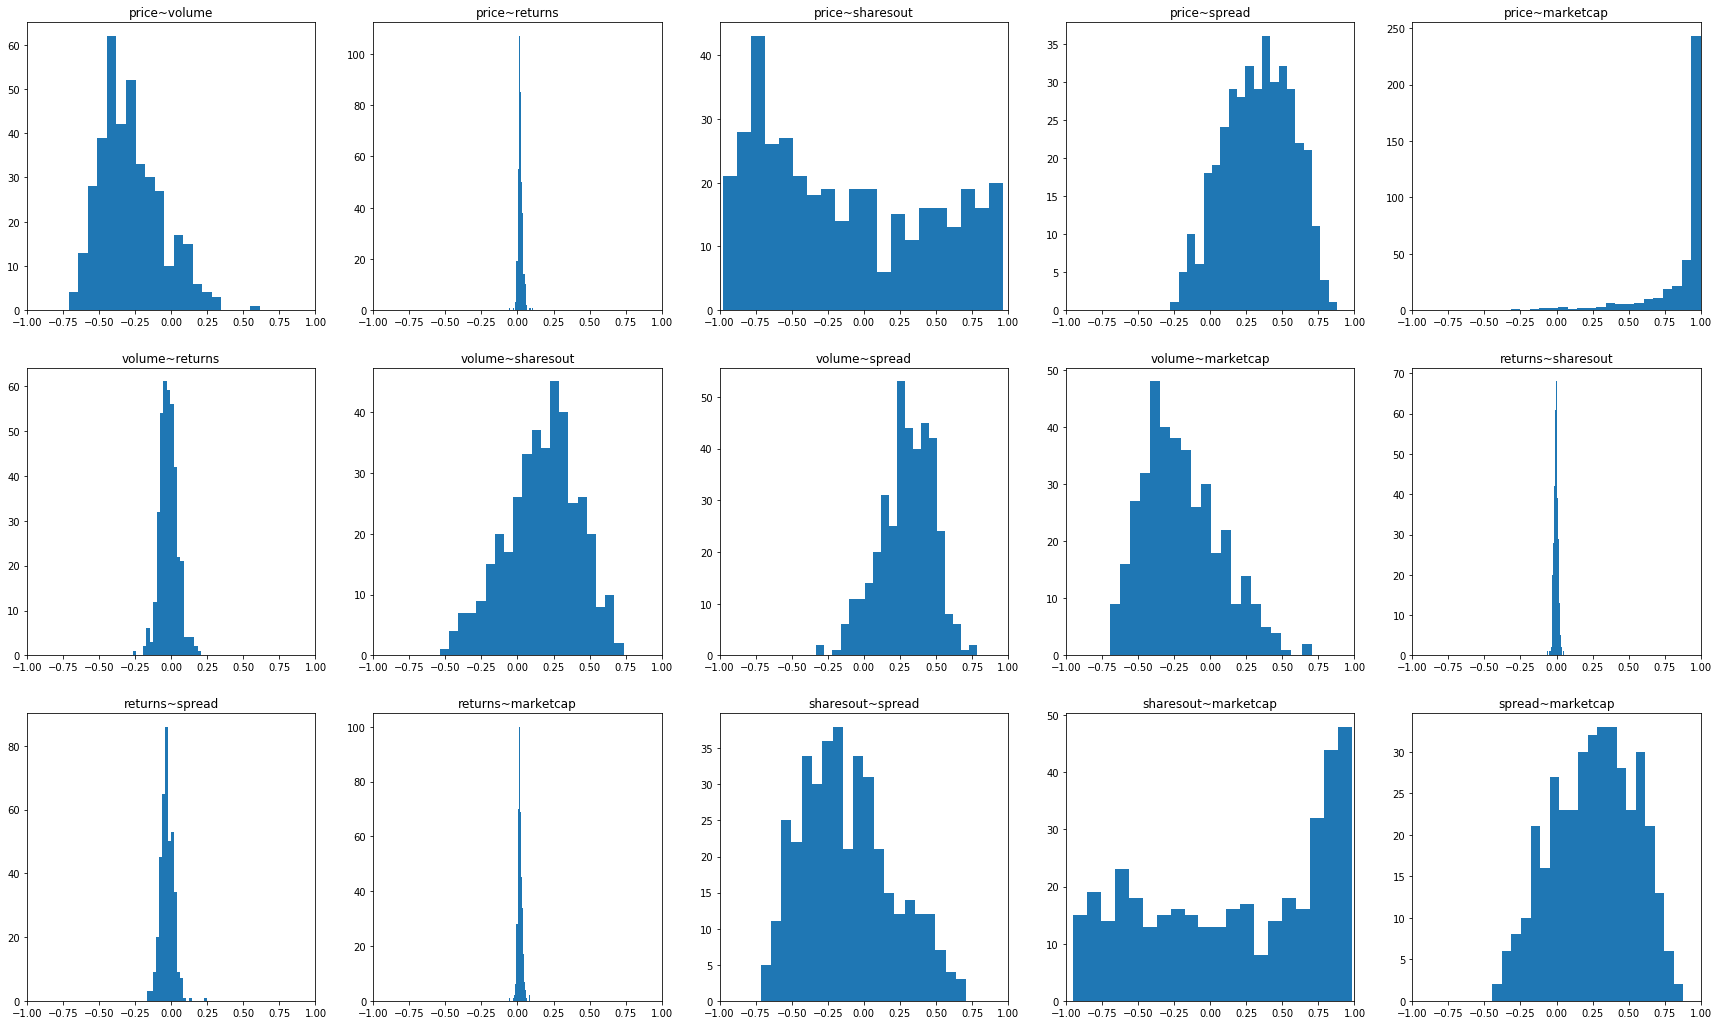

In [16]:
plt.figure(figsize=(30,18))
for i in range(corr_df.shape[1]):
    temp_series = corr_df.iloc[:, i]
    plt.subplot(3, 5, i+1)
    plt.hist(temp_series, bins=20)
    plt.xlim(-1,1)
    plt.title(corr_df.columns[i])
plt.show()

## check pairsise correlations
## for each company check the correlation between each of the variables and plot charts

plot histogram of correlations

## The follow up:
## After we've combined all of the dataframes, what is the ONE, 1, distribution of the pairwise correlations between dates (whoa nelly)
## 6*3000 metrics (each date's metric), 6*3000C2 pairs, 388 datapoints, 1 Histogram

### so far it looks like marketcap could be taken out

In [17]:
df_list = [df_price, df_volume, df_returns, df_sharesout, df_spread, df_marketcap]

In [18]:
# df_price = df_list[0]
# df_volume = df_list[1]
# df_returns = df_list[2]
# df_sharesout = df_list[3]
# df_spread = df_list[4]
# df_marketcap = df_list[5]

### append unique identifier to columns

#### price

In [19]:
temp_list = []
for value in df_price.columns:
    temp_value = value + '_price'
    temp_list.append(temp_value)

df_price.columns = temp_list
df_price.columns

Index(['2007-01-03_price', '2007-01-04_price', '2007-01-05_price',
       '2007-01-08_price', '2007-01-09_price', '2007-01-10_price',
       '2007-01-11_price', '2007-01-12_price', '2007-01-16_price',
       '2007-01-17_price',
       ...
       '2018-12-17_price', '2018-12-18_price', '2018-12-19_price',
       '2018-12-20_price', '2018-12-21_price', '2018-12-24_price',
       '2018-12-26_price', '2018-12-27_price', '2018-12-28_price',
       '2018-12-31_price'],
      dtype='object', length=3021)

#### volume

In [20]:
temp_list = []
for value in df_volume.columns:
    temp_value = value + '_volume'
    temp_list.append(temp_value)

df_volume.columns = temp_list
df_volume.columns

Index(['2007-01-03_volume', '2007-01-04_volume', '2007-01-05_volume',
       '2007-01-08_volume', '2007-01-09_volume', '2007-01-10_volume',
       '2007-01-11_volume', '2007-01-12_volume', '2007-01-16_volume',
       '2007-01-17_volume',
       ...
       '2018-12-17_volume', '2018-12-18_volume', '2018-12-19_volume',
       '2018-12-20_volume', '2018-12-21_volume', '2018-12-24_volume',
       '2018-12-26_volume', '2018-12-27_volume', '2018-12-28_volume',
       '2018-12-31_volume'],
      dtype='object', length=3021)

#### returns

In [21]:
temp_list = []
for value in df_returns.columns:
    temp_value = value + '_returns'
    temp_list.append(temp_value)

df_returns.columns = temp_list
df_returns.columns

Index(['2007-01-03_returns', '2007-01-04_returns', '2007-01-05_returns',
       '2007-01-08_returns', '2007-01-09_returns', '2007-01-10_returns',
       '2007-01-11_returns', '2007-01-12_returns', '2007-01-16_returns',
       '2007-01-17_returns',
       ...
       '2018-12-17_returns', '2018-12-18_returns', '2018-12-19_returns',
       '2018-12-20_returns', '2018-12-21_returns', '2018-12-24_returns',
       '2018-12-26_returns', '2018-12-27_returns', '2018-12-28_returns',
       '2018-12-31_returns'],
      dtype='object', length=3021)

#### sharesout

In [22]:
temp_list = []
for value in df_sharesout.columns:
    temp_value = value + '_sharesout'
    temp_list.append(temp_value)

df_sharesout.columns = temp_list
df_sharesout.columns

Index(['2007-01-03_sharesout', '2007-01-04_sharesout', '2007-01-05_sharesout',
       '2007-01-08_sharesout', '2007-01-09_sharesout', '2007-01-10_sharesout',
       '2007-01-11_sharesout', '2007-01-12_sharesout', '2007-01-16_sharesout',
       '2007-01-17_sharesout',
       ...
       '2018-12-17_sharesout', '2018-12-18_sharesout', '2018-12-19_sharesout',
       '2018-12-20_sharesout', '2018-12-21_sharesout', '2018-12-24_sharesout',
       '2018-12-26_sharesout', '2018-12-27_sharesout', '2018-12-28_sharesout',
       '2018-12-31_sharesout'],
      dtype='object', length=3021)

#### spread

In [23]:
temp_list = []
for value in df_spread.columns:
    temp_value = value + '_spread'
    temp_list.append(temp_value)

df_spread.columns = temp_list
df_spread.columns

Index(['2007-01-03_spread', '2007-01-04_spread', '2007-01-05_spread',
       '2007-01-08_spread', '2007-01-09_spread', '2007-01-10_spread',
       '2007-01-11_spread', '2007-01-12_spread', '2007-01-16_spread',
       '2007-01-17_spread',
       ...
       '2018-12-17_spread', '2018-12-18_spread', '2018-12-19_spread',
       '2018-12-20_spread', '2018-12-21_spread', '2018-12-24_spread',
       '2018-12-26_spread', '2018-12-27_spread', '2018-12-28_spread',
       '2018-12-31_spread'],
      dtype='object', length=3021)

#### marketcap

In [24]:
temp_list = []
for value in df_marketcap.columns:
    temp_value = value + '_marketcap'
    temp_list.append(temp_value)

df_marketcap.columns = temp_list
df_marketcap.columns

Index(['2007-01-03_marketcap', '2007-01-04_marketcap', '2007-01-05_marketcap',
       '2007-01-08_marketcap', '2007-01-09_marketcap', '2007-01-10_marketcap',
       '2007-01-11_marketcap', '2007-01-12_marketcap', '2007-01-16_marketcap',
       '2007-01-17_marketcap',
       ...
       '2018-12-17_marketcap', '2018-12-18_marketcap', '2018-12-19_marketcap',
       '2018-12-20_marketcap', '2018-12-21_marketcap', '2018-12-24_marketcap',
       '2018-12-26_marketcap', '2018-12-27_marketcap', '2018-12-28_marketcap',
       '2018-12-31_marketcap'],
      dtype='object', length=3021)

### concatenate the dataframes together to form superdataframe

In [25]:
full_df = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(df_price, df_volume, left_index=True, right_index=True), 
                                    df_returns, left_index=True, right_index=True),
                                    df_sharesout, left_index=True, right_index=True), 
                                    df_spread, left_index=True, right_index=True), 
                                    df_marketcap, left_index=True, right_index=True)
full_df.head()

,2007-01-03_price,2007-01-04_price,2007-01-05_price,2007-01-08_price,2007-01-09_price,2007-01-10_price,2007-01-11_price,2007-01-12_price,2007-01-16_price,2007-01-17_price,...,2018-12-17_marketcap,2018-12-18_marketcap,2018-12-19_marketcap,2018-12-20_marketcap,2018-12-21_marketcap,2018-12-24_marketcap,2018-12-26_marketcap,2018-12-27_marketcap,2018-12-28_marketcap,2018-12-31_marketcap
date,,,,,,,,,,,,,,,,,,,,,
ORCL_ORACLE CORP,17.51,17.68,17.64,17.86,17.82,17.77,17.39,17.50,17.30,17.52,...,1.732234e+08,1.736780e+08,1.759507e+08,1.751553e+08,1.666702e+08,1.617080e+08,1.689051e+08,1.703446e+08,1.697764e+08,1.620397e+08
MSFT_MICROSOFT CORP,29.86,29.81,29.64,29.93,29.96,29.66,30.70,31.21,31.16,31.10,...,7.898062e+08,7.980965e+08,7.959471e+08,7.792130e+08,7.540350e+08,7.225625e+08,7.719206e+08,7.766798e+08,7.706156e+08,7.796736e+08
TROW_T ROWE PRICE GROUP INC,45.75,46.15,46.06,46.90,47.09,47.36,48.29,48.56,48.06,48.25,...,2.190682e+07,2.185147e+07,2.127631e+07,2.100918e+07,2.088404e+07,2.044364e+07,2.157472e+07,2.197421e+07,2.198143e+07,2.221727e+07
HON_HONEYWELL INTERNATIONAL INC,45.10,45.08,44.65,44.92,45.24,44.96,45.71,45.56,45.62,45.54,...,9.947990e+07,1.000721e+08,9.865077e+07,9.673343e+07,9.582288e+07,9.241015e+07,9.591912e+07,9.739970e+07,9.680005e+07,9.780685e+07
ADM_ARCHER DANIELS MIDLAND CO,32.06,31.88,31.83,31.99,31.21,30.94,31.68,30.96,31.02,31.18,...,2.432074e+07,2.401799e+07,2.377131e+07,2.311535e+07,2.287428e+07,2.221272e+07,2.280139e+07,2.296398e+07,2.286306e+07,2.296958e+07


In [27]:
pd.Series(full_df.columns).to_csv('data\\external\\full_columns.csv')

C:\PROGRA1\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  if __name__ == '__main__':


### do the same for each date

for each date column:
<br>
compute the pair-wise correlations

In [45]:
from time import time
def timing(f):
    def wrap(*args):
        time1 = time()
        ret = f(*args)
        time2 = time()
        print('{:s} function took {:.3f} ms'.format(f.__name__, (time2-time1)*1000.0))

        return ret
    return wrap

In [29]:
np.corrcoef(full_df.iloc[:, 0], full_df.iloc[:, 1])[0][1]

0.9997741352899286

#### this function takes way too much time

In [46]:
@timing
def corr_dates():    
    corr_dates = []
    for i in range(len(full_df.columns)):
        for j in range(len(full_df.columns)):
            if i <=j:
                temp_value = np.corrcoef(full_df.iloc[:, i], full_df.iloc[:, j])[0][1]
                corr_dates.append(temp_value)
            else:
                pass
    return corr_dates


corr_dates = corr_dates()
print(len(corr_dates))

KeyboardInterrupt: 

In [44]:
#corr_dates

#determine if any variables need to be removed

## Next idea:
## Gien a distribution of a set of correlations, which metrics should we leave out?